In [93]:
from csv import reader
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from datetime import datetime

In [84]:
df = pd.read_csv('/content/drive/MyDrive/consumption/consumption_db/train.csv')

In [85]:
df

,num_date_time,건물번호,일시,기온(C),강수량(mm),풍속(m/s),습도(%),일조(hr),일사(MJ/m2),전력소비량(kWh)
0,1_20220601 00,1,20220601 00,18.6,NaN,0.9,42.0,NaN,NaN,1085.28
1,1_20220601 01,1,20220601 01,18.0,NaN,1.1,45.0,NaN,NaN,1047.36
2,1_20220601 02,1,20220601 02,17.7,NaN,1.5,45.0,NaN,NaN,974.88
3,1_20220601 03,1,20220601 03,16.7,NaN,1.4,48.0,NaN,NaN,953.76
4,1_20220601 04,1,20220601 04,18.4,NaN,2.8,43.0,NaN,NaN,986.40
...,...,...,...,...,...,...,...,...,...,...
203995,100_20220824 19,100,20220824 19,23.1,NaN,0.9,86.0,0.5,NaN,881.04
203996,100_20220824 20,100,20220824 20,22.4,NaN,1.3,86.0,0.0,NaN,798.96
203997,100_20220824 21,100,20220824 21,21.3,NaN,1.0,92.0,NaN,NaN,825.12
203998,100_20220824 22,100,20220824 22,21.0,NaN,0.3,94.0,NaN,NaN,640.08


In [87]:
df = df.rename(columns={
    '일시': 'date',
    '기온(C)': 'temperature',
    '전력소비량(kWh)':'consumption',
    '건물번호' : 'building'
})
df.drop('num_date_time', axis = 1, inplace=True)
df.drop('강수량(mm)', axis = 1, inplace=True)
df.drop('풍속(m/s)', axis = 1, inplace=True)
df.drop('습도(%)', axis = 1, inplace=True)
df.drop('일조(hr)', axis = 1, inplace=True)
df.drop('일사(MJ/m2)', axis = 1, inplace=True)

In [74]:
df

,building,date,temperature,consumption
0,1,20220601 00,18.6,1085.28
1,1,20220601 01,18.0,1047.36
2,1,20220601 02,17.7,974.88
3,1,20220601 03,16.7,953.76
4,1,20220601 04,18.4,986.40
...,...,...,...,...
203995,100,20220824 19,23.1,881.04
203996,100,20220824 20,22.4,798.96
203997,100,20220824 21,21.3,825.12
203998,100,20220824 22,21.0,640.08


In [82]:
df.iloc[:,1] = pd.to_datetime(df.iloc[:,1])

<ipython-input-82-6ab43bc958e8>:1: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df.iloc[:,1] = pd.to_datetime(df.iloc[:,1])


In [88]:
df

,building,date,temperature,consumption
0,1,20220601 00,18.6,1085.28
1,1,20220601 01,18.0,1047.36
2,1,20220601 02,17.7,974.88
3,1,20220601 03,16.7,953.76
4,1,20220601 04,18.4,986.40
...,...,...,...,...
203995,100,20220824 19,23.1,881.04
203996,100,20220824 20,22.4,798.96
203997,100,20220824 21,21.3,825.12
203998,100,20220824 22,21.0,640.08


## 데이터 시각화

온도에 따른 전력소모량 전체

데이터가 선형적이지 않다. 전처리가 필요

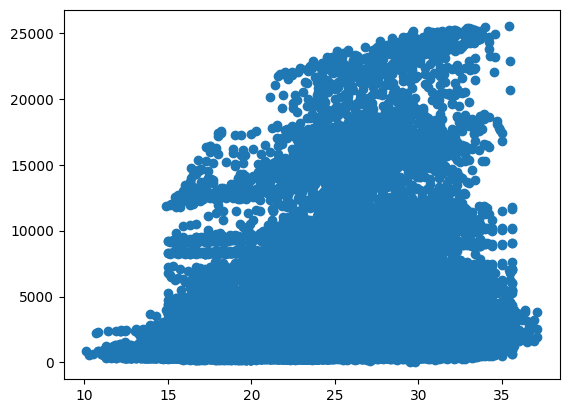

In [89]:
import matplotlib.pyplot as plt

plt.scatter(df.iloc[:,2],df.iloc[:,3])
plt.show()

In [91]:
df['date'] = pd.to_datetime(df['date'], format='%Y%m%d %H')

# date time feature 생성
df['hour'] = df['date'].dt.hour
df['day'] = df['date'].dt.day
df['month'] = df['date'].dt.month
df['year'] = df['date'].dt.year

In [99]:
# 년기준 일 평균 소비전력
df['day_of_year'] = df['date'].dt.dayofyear
mean_power_by_day_of_year = df.groupby('day_of_year')['consumption'].mean()
# 년기준 시간평균 소비전력
df['hour_of_year'] = df['date'].dt.hour + (df['date'].dt.dayofyear - 1) * 24
mean_power_by_hour_of_year = df.groupby('hour_of_year')['consumption'].mean()
# 년기준 요일 평균 소비전력
df['weekday_of_year'] = df['date'].dt.weekday
mean_power_by_weekday_of_year = df.groupby('weekday_of_year')['consumption'].mean()

# 년기준 월평균 소비전력
mean_power_by_month = df.groupby('month')['consumption'].mean()

# 일기준 시간 평균 소비전력
mean_power_by_hour = df.groupby('hour')['consumption'].mean()

# 월기준 시간 평균 소비전력
mean_power_by_day = df.groupby('day')['consumption'].mean()

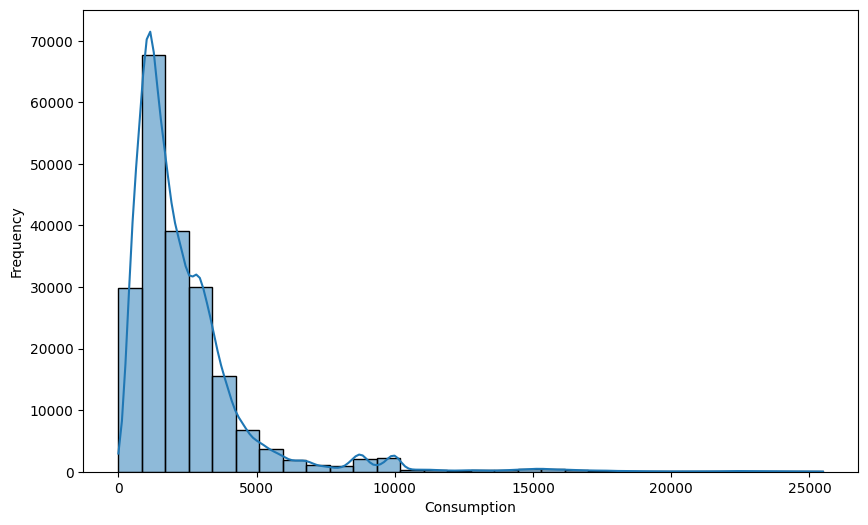

In [96]:
# histogram 생성
plt.figure(figsize=(10, 6))
sns.histplot(df['consumption'], bins=30, kde=True)
plt.xlabel('Consumption')
plt.ylabel('Frequency')
plt.show()

6월 1일부터 8월 24일까지

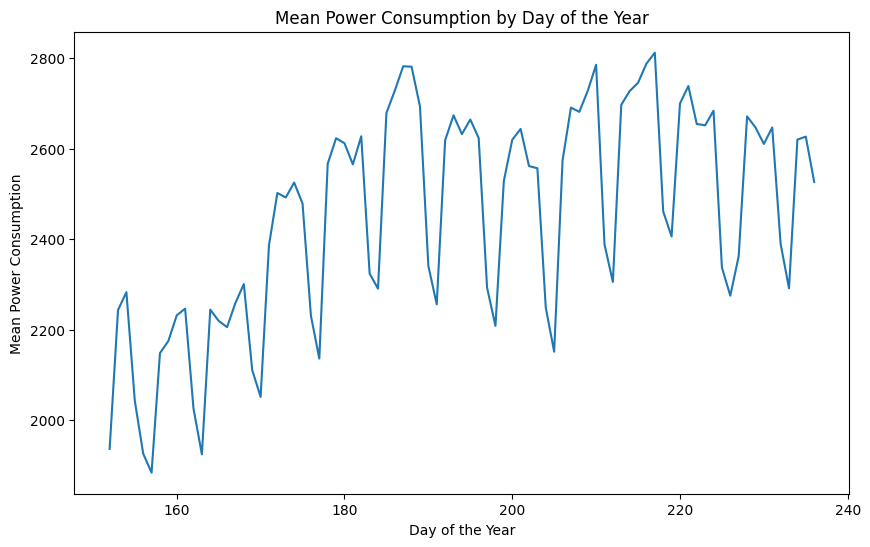

In [97]:
plt.figure(figsize=(10, 6))
sns.lineplot(x=mean_power_by_day_of_year.index, y=mean_power_by_day_of_year.values)
plt.title('Mean Power Consumption by Day of the Year')
plt.xlabel('Day of the Year')
plt.ylabel('Mean Power Consumption')
plt.show()

시간대별로 전력소모량

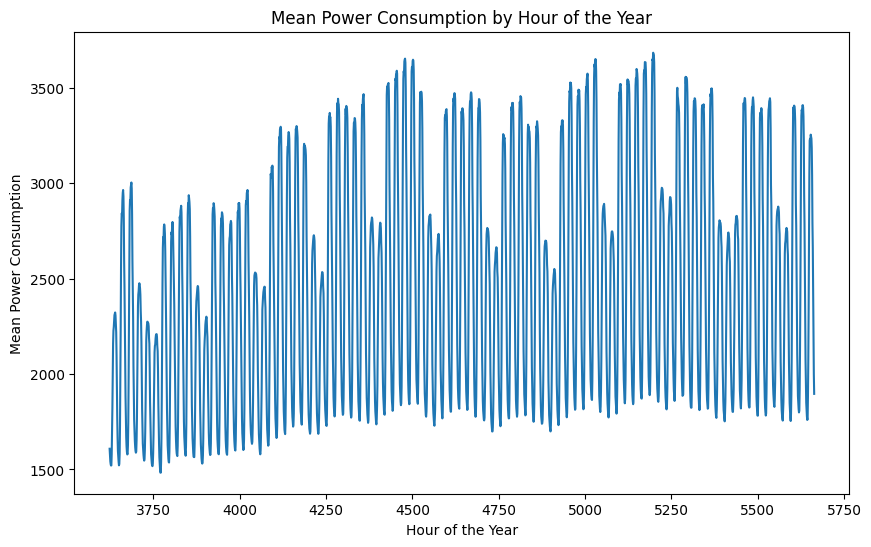

In [98]:
plt.figure(figsize=(10, 6))
sns.lineplot(x=mean_power_by_hour_of_year.index, y=mean_power_by_hour_of_year.values)
plt.title('Mean Power Consumption by Hour of the Year')
plt.xlabel('Hour of the Year')
plt.ylabel('Mean Power Consumption')
plt.show()

요일별 소모량

0 - 월요일

6 - 일요일

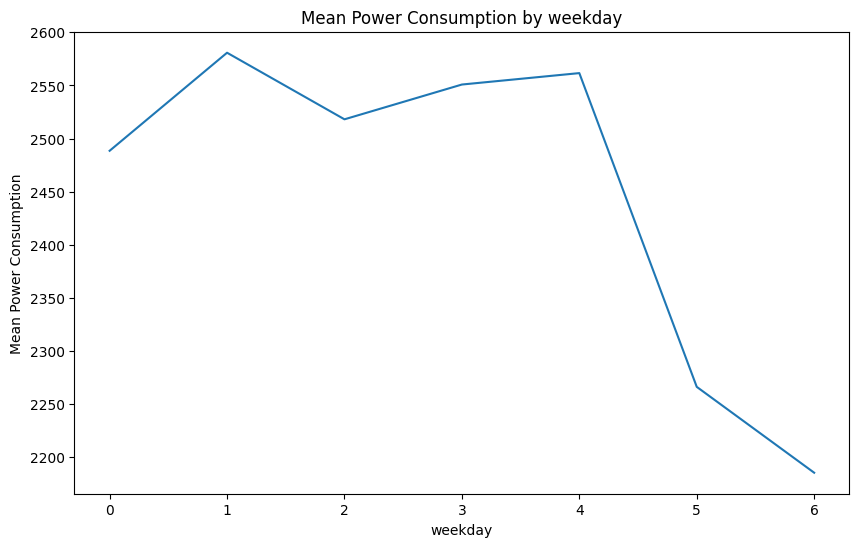

In [100]:
plt.figure(figsize=(10, 6))
sns.lineplot(x=mean_power_by_weekday_of_year.index, y=mean_power_by_weekday_of_year.values)
plt.title('Mean Power Consumption by weekday')
plt.xlabel('weekday')
plt.ylabel('Mean Power Consumption')
plt.show()

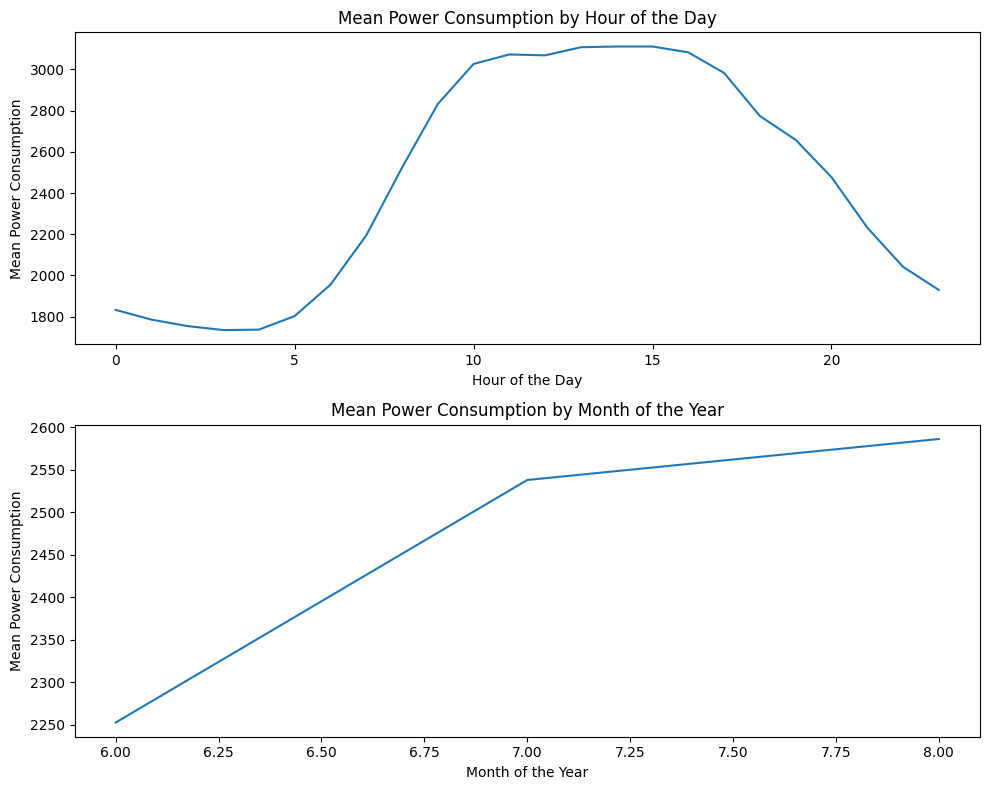

In [167]:
fig, axs = plt.subplots(2, 1, figsize=(10, 8))

# Plot mean power consumption by hour of the day
sns.lineplot(x=mean_power_by_hour.index, y=mean_power_by_hour.values, ax=axs[0])
axs[0].set_title('Mean Power Consumption by Hour of the Day')
axs[0].set_xlabel('Hour of the Day')
axs[0].set_ylabel('Mean Power Consumption')
# 년기준 월평균 소비전력
sns.lineplot(x=mean_power_by_month.index, y=mean_power_by_month.values, ax=axs[1])
axs[1].set_title('Mean Power Consumption by Month of the Year')
axs[1].set_xlabel('Month of the Year')
axs[1].set_ylabel('Mean Power Consumption')

plt.tight_layout()
plt.show()

- 낮 시간대에는 전력소모량이 증가한다.
- 8월에 가까워질수록 전체적인 사용량이 많아진다.
- 평일에는 소모량이 높지만 주말에는 낮다.

데이터 전처리 과정에서 주말과 밤 시간(20:00 ~ 07:00)까지 빼는 것이 더 연관성이 있을 것이다.



In [172]:
new_df = df[~df['hour'].isin([20, 21,22, 23, 24, 0, 1, 2, 3, 4, 5, 6,7])]
new_df = new_df[~new_df['weekday_of_year'].isin([5, 6])]

In [173]:
tempdf = new_df[new_df['building'] == 100]

In [176]:
new_df.head()

,building,date,temperature,consumption,hour,day,month,year,day_of_year,hour_of_year,weekday_of_year
8,1,2022-06-01 08:00:00,20.6,1976.16,8,1,6,2022,152,3632,2
9,1,2022-06-01 09:00:00,23.2,2289.12,9,1,6,2022,152,3633,2
10,1,2022-06-01 10:00:00,24.8,2683.20,10,1,6,2022,152,3634,2
11,1,2022-06-01 11:00:00,26.3,2730.72,11,1,6,2022,152,3635,2
12,1,2022-06-01 12:00:00,27.5,2665.92,12,1,6,2022,152,3636,2


1번 건물 온도별 전력사용량

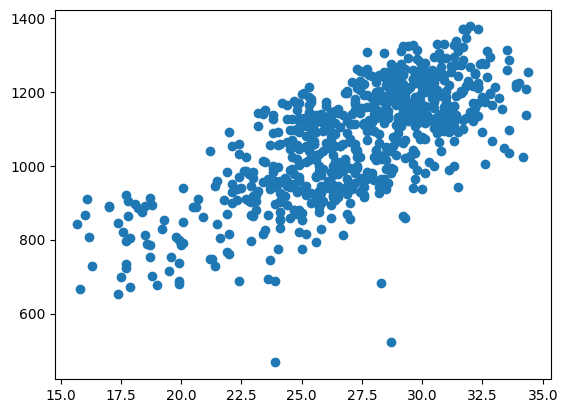

In [174]:
import matplotlib.pyplot as plt

plt.scatter(tempdf.iloc[:,2],tempdf.iloc[:,3])
plt.show()

몇가지 점들을 빼면 대부분 우상향을 보여준다.

선형회귀 모델을 사용

기준 모델과 예측 모델(OLS)의 성능을 에러 값을 통해 판단.

예측 모델
 회귀 직선을 그리기 위해서는 최소자승법(=최소제곱법)을 이용해야 한다.

최소자승법은 잔차제곱의 합(RRS, residual sum of squares)를 최소화하는 가중치 벡터를 구하는 방법이다.

잔차란 예측값과 관측값의 차이이다.

RSS가 모델의 비용함수로 이 값을 최소화하는 모델을 찾아가는 과정을 학습이라 한다.

In [235]:
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
def result(_building_info, _temperature):
  df_1 = new_df[new_df['building']==_building_info]
  y = df_1["consumption"]

  #define explanatory variable
  x = df_1["temperature"]

  #add constant to predictor variables
  x = sm.add_constant(x)

  #fit linear regression model
  model = sm.OLS(y, x).fit()

  b0=model.params[0]
  b1=model.params[1]
  prediction = b0+b1*df_1["temperature"]
  result_pred = b0+b1*_temperature

  plt.scatter(df_1.iloc[:,2],df_1.iloc[:,3])
  plt.plot(df_1["temperature"],prediction,color="r")
  plt.show()

  print(f"\n{_building_info}번 빌딩의 예상 전력소모량은 {round(result_pred,3)}kWh입니다")



빌딩 번호를 입력해주세요 : 61
예상 온도를 입력해주세요 : 35.6


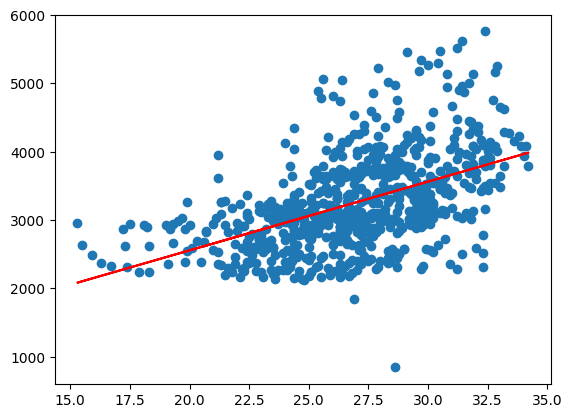


61번 빌딩의 예상 전력소모량은 4126.766kWh입니다


In [237]:
a = int(input("빌딩 번호를 입력해주세요 : "))
b = float(input("예상 온도를 입력해주세요 : "))
result(a,b)